ML-Supervised Learning Project-1

Step 1: Data Cleaning & Preprocessing

The first step is Load the data & understand the data very well.

In [70]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
# Load dataset
df = pd.read_csv("C:/Users/TadeleBizuye/OneDrive - esxethiopia/Desktop/Laabza/Baacumen/M_6 Machine Learning/train.csv")

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [74]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

Step 1: Data Cleaning & Preprocessing 
 1.1 Handling Missing Data)

In [76]:
df["churn_risk_score"].value_counts() # This is our tareget variable. 

churn_risk_score
 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: count, dtype: int64

In [78]:
# To check the missing values
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [25]:
# To know how many data sets are missed. the first .sum() indicates coloumn & the second .sum() indicates No of columns.
pd.isnull(df).sum().sum() # As we can see in the output there are 9159 missed values. so we need to fill the missing values or remove it

9159

In [80]:
df["preferred_offer_types"].value_counts()

preferred_offer_types
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64

In [82]:
df = df[df["region_category"].notnull()]
df = df[df["points_in_wallet"].notnull()]
df.isnull().sum()

customer_id                       0
Name                              0
age                               0
gender                            0
security_no                       0
region_category                   0
membership_category               0
joining_date                      0
joined_through_referral           0
referral_id                       0
preferred_offer_types           217
medium_of_operation               0
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
churn_risk_score                  0
dtype: int64

As we  can see in the above only column  "preferred_offer_types" has a missing values so we need to adjust it.

In [84]:
df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0], inplace=True)
df.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

Waw!

Now All missing values are Handeled

All Columns in our data have equal number of rows(28,590)!

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28590 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   28590 non-null  object 
 1   Name                          28590 non-null  object 
 2   age                           28590 non-null  int64  
 3   gender                        28590 non-null  object 
 4   security_no                   28590 non-null  object 
 5   region_category               28590 non-null  object 
 6   membership_category           28590 non-null  object 
 7   joining_date                  28590 non-null  object 
 8   joined_through_referral       28590 non-null  object 
 9   referral_id                   28590 non-null  object 
 10  preferred_offer_types         28590 non-null  object 
 11  medium_of_operation           28590 non-null  object 
 12  internet_option               28590 non-null  object 
 13  last_v

1.2 Data Type Correction

In [88]:
#Data Type Correction

# Convert 'joining_date' to datetime format
df['joining_date'] = pd.to_datetime(df['joining_date'], format='%Y-%m-%d')


# Convert 'last_visit_time' to time format (Hour : Minute: Second)
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'], format='%H:%M:%S').dt.time

# Convert 'avg_frequency_login_days' to numerical (float), 
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')


1.3 Encoding Categorical Variables

In [92]:
# Label Encoding for binary categorical features
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])  # e.g., Male=1, Female=0
df['joined_through_referral'] = label_encoder.fit_transform(df['joined_through_referral'])  # Yes=1, No=0
df['used_special_discount'] = label_encoder.fit_transform(df['used_special_discount'])  # Yes=1, No=0
df['offer_application_preference'] = label_encoder.fit_transform(df['offer_application_preference'])  # Yes=1, No=0
df['past_complaint'] = label_encoder.fit_transform(df['past_complaint'])  # Yes=1, No=0

# One-Hot Encoding for other categorical features( i.e more than two categories)
#columns that needs to be encoding=['region_category', 'membership_category', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'complaint_status']

# Dear Teams,  Add this OneHot Encoder!!

In [94]:
df.describe()

,age,gender,joining_date,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,churn_risk_score
count,28590.000000,28590.000000,28590,28590.000000,28590.000000,28590.000000,28590.000000,25869.000000,28590.000000,28590.000000,28590.000000,28590.000000,28590.000000
mean,37.088213,0.501049,2016-07-04 00:50:22.035676672,1.277160,-42.527807,243.529133,29306.422163,15.986902,687.916765,0.548793,0.553900,0.498496,3.458237
min,10.000000,0.000000,2015-01-01 00:00:00,0.000000,-999.000000,-2814.109110,800.460000,-43.652702,-760.661236,0.000000,0.000000,0.000000,-1.000000
25%,23.000000,0.000000,2015-09-30 00:00:00,1.000000,8.000000,59.802500,14188.600000,9.000000,616.722500,0.000000,0.000000,0.000000,3.000000
50%,37.000000,0.000000,2016-07-05 00:00:00,1.000000,12.000000,161.560000,27549.730000,16.000000,698.460000,1.000000,1.000000,0.000000,4.000000
75%,51.000000,1.000000,2017-04-07 00:00:00,2.000000,16.000000,356.525000,40892.330000,23.000000,764.917500,1.000000,1.000000,1.000000,5.000000
max,64.000000,2.000000,2017-12-31 00:00:00,2.000000,26.000000,3040.410000,99914.050000,73.061995,2069.069761,1.000000,1.000000,1.000000,5.000000
std,15.890970,0.503007,NaN,0.703021,230.003371,401.228681,19506.414809,9.254172,194.303818,0.497622,0.497095,0.500006,1.411634


In [96]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,0,XW0DQ7H,Village,Platinum Membership,2017-08-17,1,xxxxxxxx,...,300.63,53005.25,17.0,781.75,1,1,0,Not Applicable,Products always in Stock,2
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,0,1F2TCL3,Town,No Membership,2016-11-11,2,CID12313,...,516.16,21027.00,22.0,500.69,0,1,1,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,1,VJGJ33N,City,No Membership,2016-10-29,2,CID3793,...,53.27,25239.56,6.0,567.66,0,1,1,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,0,SVZXCWB,City,No Membership,2017-09-12,1,xxxxxxxx,...,113.13,24483.66,16.0,663.06,0,1,1,Solved,Poor Website,5
5,fffe43004900440036003300320035003300,Leslie Browder,13,1,PSG1LGF,City,Gold Membership,2016-01-08,1,xxxxxxxx,...,433.62,13884.77,24.0,722.27,1,0,1,Unsolved,No reason specified,3


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28590 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   28590 non-null  object 
 1   Name                          28590 non-null  object 
 2   age                           28590 non-null  int64  
 3   gender                        28590 non-null  int32  
 4   security_no                   28590 non-null  object 
 5   region_category               28590 non-null  object 
 6   membership_category           28590 non-null  object 
 7   joining_date                  28590 non-null  object 
 8   joined_through_referral       28590 non-null  int32  
 9   referral_id                   28590 non-null  object 
 10  preferred_offer_types         28590 non-null  object 
 11  medium_of_operation           28590 non-null  object 
 12  internet_option               28590 non-null  object 
 13  last_v

1.4 Outlier Detection & Handling

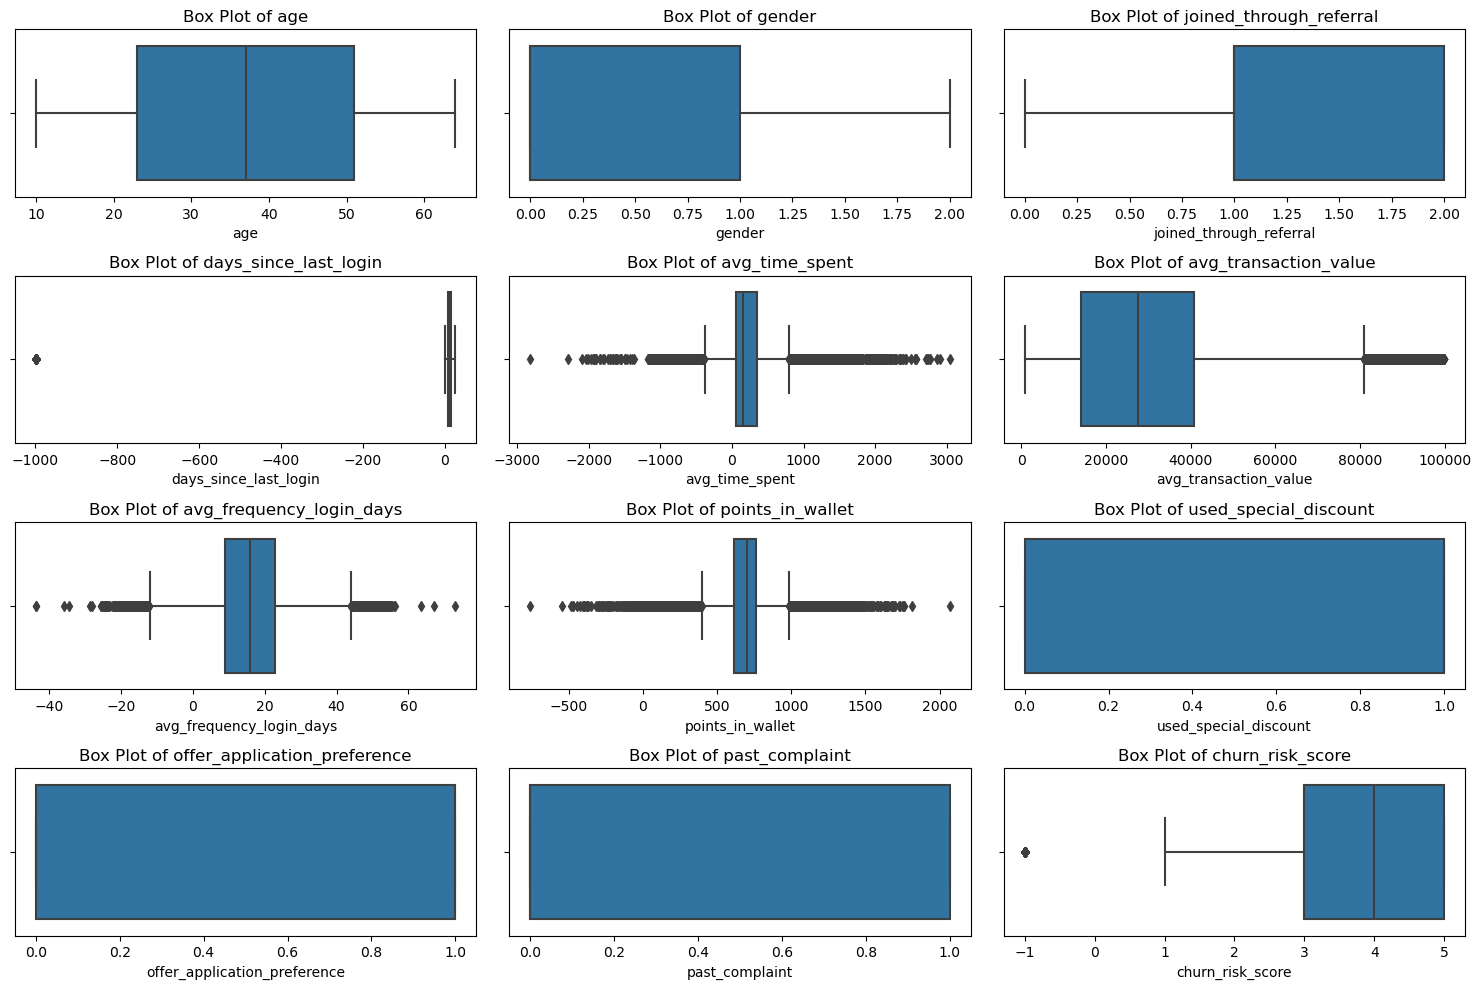

In [98]:
continues_variables = df.select_dtypes(include = ['float64', 'int64'])
plt.figure(figsize=(15, 10))
for i, column in enumerate(continues_variables):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=continues_variables[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show();

In [100]:
continues_variables = continues_variables.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), 
                                                         upper = x.quantile(0.95)))

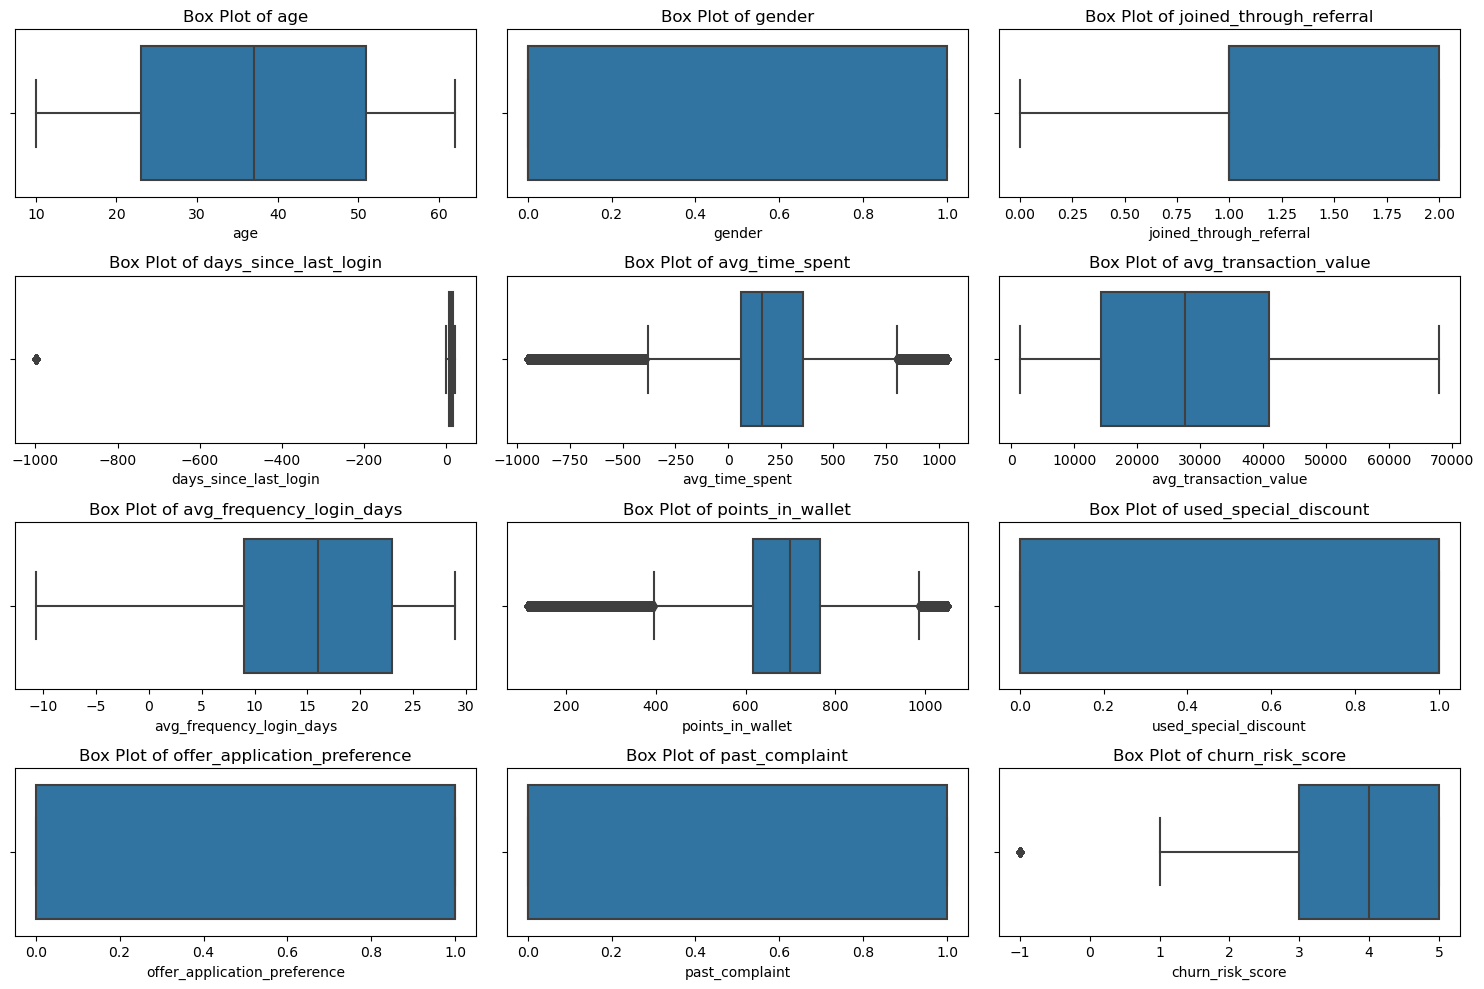

In [102]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(continues_variables):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=continues_variables[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show();

1.5 Feature Engineering

In [104]:
# 1.5 Feature Engineering
df['customer_tenure'] = (pd.to_datetime('today') - df['joining_date']).dt.days
df['engagement_score'] = df['days_since_last_login'] / df['avg_time_spent']
# Example of engagement-based feature: active login days (from 'days_since_last_login')
df['active_days'] = 30 / df['days_since_last_login']  # Assuming logins per month
# Verify new features
print(df[['customer_tenure','engagement_score', 'active_days']].head())


   customer_tenure  engagement_score  active_days
0             2607          0.056548     1.764706
2             2886          0.027123     2.142857
3             2899          0.206495     2.727273
4             2581          0.176788     1.500000
5             3194          0.053042     1.304348
